In [8]:
# The function create_staircase that takes a list of numbers as input 
# and returns a list of subsets of the input list, arranged in a staircase-like manner. 
def create_staircase(nums):
  while len(nums) != 0:
    step = 1
    subsets = []
    if len(nums) >= step:
      subsets.append(nums[0:step])
      nums = nums[step:]
      step += 1
    else:
      return False

  return subsets

# Input: [1, 2, 3, 4, 5, 6] ###### Output: [[1], [2, 3], [4, 5, 6]]

# Input: [1, 2, 3, 4, 5, 6, 7]#### Output: False
Input= [1, 2, 3, 4, 5, 6]
print(create_staircase(Input))

[[6]]


In [11]:
def create_staircase(nums):
  step = 1
  subsets = []
  while len(nums) != 0:
    if len(nums) >= step:
      subsets.append(nums[0:step])
      nums = nums[step:]
      step += 1
    else:
      return False

  return subsets

Input= [1, 2, 3, 4, 5, 6]
print(create_staircase(Input))

Input = [1, 2, 3, 4, 5, 6, 7]#### Output: False

print(create_staircase(Input))

[[1], [2, 3], [4, 5, 6]]
False


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub'
data = requests.get(url).text
# Parsing the data using BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')
# Extracting data from the table into a DataFrame
unicode_characters = pd.DataFrame(columns=['x_coordinate', 'Character', 'y_coordinate'])  # Consistent column names
table = soup.find('table')
rows = table.find_all('tr')

# Skip the header row
for row in rows[1:]:
    cols = row.find_all('td')
    x_coordinate = int(cols[0].get_text().strip())
    Character = cols[1].get_text().strip()
    y_coordinate = int(cols[2].get_text().strip())
    new_row = pd.DataFrame({'x_coordinate': [x_coordinate], 'Character': [Character], 'y_coordinate': [y_coordinate]})
    # Concatenate the new row to the unicode_characters DataFrame
    unicode_characters = pd.concat([unicode_characters, new_row], ignore_index=True)

# find max of x and y coordinate to set the grid dimentions
max_x = unicode_characters['x_coordinate'].max()
max_y = unicode_characters['y_coordinate'].max()

# # Initialize the grid with spaces, with dimensions max_y+1 by max_x+1
grid = [[' ' for _ in range(max_y + 1)] for _ in range(max_x + 1)]

# fill the grid with the characters from the data frame
for i in range(len(unicode_characters)):
  x = unicode_characters.loc[i, 'x_coordinate']
  y = unicode_characters.loc[i, 'y_coordinate']
  char = unicode_characters.loc[i, 'Character']
  grid[x][y] = char
import time
# print the grid row by row and flip the y-axit to correct the charchters' orientation
for y in range(max_y ,-1,-1):
    for x in range(max_x+1):
         print(grid[x][y], end='')
         time.sleep(0.005)
    print()



██████████░ ██████░    ███████░  ██░           ███░ ████████░    ██░    ███░   ████████░  
██░           ██░    ███░    ██░ ███░   ███░   ██░  ██░     ██░  ██░  ███░   ███░     ███░
██░           ██░   ███░          ██░  █████░ ███░  ██░      ██░ ██░███░     ██░       ██░
████████░     ██░   ██░           ███░ ██░██░ ██░   ██░      ██░ ████░       ██░       ██░
██░           ██░   ███░           ██░██░ ██░██░    ██░      ██░ ██░███░     ██░       ██░
██░           ██░    ███░    ██░   ████░   ████░    ██░     ██░  ██░  ███░   ███░     ███░
██████████░ ██████░    ███████░     ██░     ██░     ████████░    ██░    ███░   ████████░  


In [6]:
# This code  extracts data from a Google Doc that has a table of charchters withtheir coordinates,
#  Then prints a grid of these characters acording to their coordinates. 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def print_character_grid(url):
    """
    Fetches data from a Google Doc, extracts character and coordinate information,
    and prints a grid of the characters.

    Args:
        url (str): The URL of the Google Doc containing the input data.
    """

    # Fetch data from the Google Doc
    data = requests.get(url).text

    # Parse the HTML content
    soup = BeautifulSoup(data, 'html.parser')

    # Extract data from the table
    unicode_characters = pd.DataFrame(columns=['x_coordinate', 'Character', 'y_coordinate'])
    table = soup.find('table')
    rows = table.find_all('tr')

    # Skip the header row
    for row in rows[1:]:
        cols = row.find_all('td')
        x_coordinate = int(cols[0].get_text().strip())
        Character = cols[1].get_text().strip()
        y_coordinate = int(cols[2].get_text().strip())
        new_row = pd.DataFrame({'x_coordinate': [x_coordinate], 'Character': [Character], 'y_coordinate': [y_coordinate]})
        unicode_characters = pd.concat([unicode_characters, new_row], ignore_index=True)

    # Find max x and y coordinates to set grid dimensions
    max_x = unicode_characters['x_coordinate'].max()
    max_y = unicode_characters['y_coordinate'].max()

    # Initialize the grid with spaces
    grid = [[' ' for _ in range(max_y + 1)] for _ in range(max_x + 1)]

    # Fill the grid with characters
    for i in range(len(unicode_characters)):
        x = unicode_characters.loc[i, 'x_coordinate']
        y = unicode_characters.loc[i, 'y_coordinate']
        char = unicode_characters.loc[i, 'Character']
        grid[x][y] = char

    # Print the grid row by row, flipping the y-axis
    for y in range(max_y, -1, -1):
        for x in range(max_x + 1):
            print(grid[x][y], end='')
            time.sleep(0.005)  # Optional delay for visual effect
        print()

url = 'https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub'

# Call the function
print_character_grid(url)

██████████░ ██████░    ███████░  ██░           ███░ ████████░    ██░    ███░   ████████░  
██░           ██░    ███░    ██░ ███░   ███░   ██░  ██░     ██░  ██░  ███░   ███░     ███░
██░           ██░   ███░          ██░  █████░ ███░  ██░      ██░ ██░███░     ██░       ██░
████████░     ██░   ██░           ███░ ██░██░ ██░   ██░      ██░ ████░       ██░       ██░
██░           ██░   ███░           ██░██░ ██░██░    ██░      ██░ ██░███░     ██░       ██░
██░           ██░    ███░    ██░   ████░   ████░    ██░     ██░  ██░  ███░   ███░     ███░
██████████░ ██████░    ███████░     ██░     ██░     ████████░    ██░    ███░   ████████░  


In [70]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the Google Doc containing the Unicode characters and their positions
url = 'https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub'
url2 ='https://docs.google.com/document/d/e/2PACX-1vRMx5YQlZNa3ra8dYYxmv-QIQ3YJe8tbI3kqcuC7lQiZm-CSEznKfN_HYNSpoXcZIV3Y_O3YoUB1ecq/pub'
# data = requests.get(url).text
data = requests.get(url2).text
# Parsing the data using BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

# Extracting data from the table into a DataFrame
unicode_characters = pd.DataFrame(columns=['x_coordinate', 'Character', 'y_coordinate'])
table = soup.find('table')
rows = table.find_all('tr')

# Skip the header row and extract data
for row in rows[1:]:
    cols = row.find_all('td')
    x_coordinate = int(cols[0].get_text().strip())
    character = cols[1].get_text().strip()
    y_coordinate = int(cols[2].get_text().strip())
    new_row = pd.DataFrame({'x_coordinate': [x_coordinate], 'Character': [character], 'y_coordinate': [y_coordinate]})
    unicode_characters = pd.concat([unicode_characters, new_row], ignore_index=True)

unicode_characters.head(20)
# Determine the size of the grid
max_x = unicode_characters['x_coordinate'].max()
max_y = unicode_characters['y_coordinate'].max()
print(f"The max x and y coordinate is:{max_x},{max_y}")

# # Initialize the grid with spaces, with dimensions max_y+1 by max_x+1
# no of rows = max_y, no of cols = max_x
grid = [[' ' for _ in range(max_x + 1)] for _ in range(max_y + 1)]
for line in grid: print(line)


print("\n\n\n")
# # Populate the grid with characters (correcting the orientation)
for index, row in unicode_characters.iterrows():
    x = row['x_coordinate']
    y = row['y_coordinate']

    # Ensure y-coordinate is within bounds
    if y <= max_y and x <= max_x:
        y = max_y - y  # Flip the y-coordinate to account for bottom-left origin
        grid[y][x] = row['Character']  # Place the character at the correct position


for line in grid: print(line)
# # Write the grid to a file
output_file = 'output_grid.txt'
with open(output_file, 'w') as file:
    for line in grid:
        file.write(''.join(line) + '\n')

print(f"The grid has been written to {output_file}")
with open(output_file, "r") as f:
  print(f.read())


The max x and y coordinate is:3,2
[' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ']




['█', '▀', '▀', '▀']
['█', '▀', '▀', ' ']
['█', ' ', ' ', ' ']
The grid has been written to output_grid.txt
█▀▀▀
█▀▀ 
█   



In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Google Doc containing the Unicode characters and their positions
url = 'https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub'
data = requests.get(url).text

# Parsing the data using BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

# Extracting data from the table into a DataFrame
unicode_characters = pd.DataFrame(columns=['x_coordinate', 'Character', 'y_coordinate'])
table = soup.find('table')
rows = table.find_all('tr')

# Skip the header row and extract data
for row in rows[1:]:
    cols = row.find_all('td')
    x_coordinate = int(cols[0].get_text().strip())
    character = cols[1].get_text().strip()
    y_coordinate = int(cols[2].get_text().strip())
    new_row = pd.DataFrame({'x_coordinate': [x_coordinate], 'Character': [character], 'y_coordinate': [y_coordinate]})
    unicode_characters = pd.concat([unicode_characters, new_row], ignore_index=True)

# Determine the size of the grid
max_x = unicode_characters['x_coordinate'].max()
max_y = unicode_characters['y_coordinate'].max()

# Initialize the grid with spaces, with dimensions max_y+1 by max_x+1
grid = [[' ' for _ in range(max_x + 1)] for _ in range(max_y + 1)]

# Populate the grid with characters, flipping the y-coordinate
for index, row in unicode_characters.iterrows():
    x = row['x_coordinate']
    y = row['y_coordinate']

    # Adjust y-coordinate to account for bottom-left origin
    flipped_y = max_y - y

    # Ensure y-coordinate is within bounds
    if flipped_y <= max_y and x <= max_x:
        grid[flipped_y][x] = row['Character']  # Place the character at the correct position

# Print the grid to check the output before writing to a file
for line in grid:
    print(''.join(line))

# Write the grid to a file
output_file = 'output_grid.txt'
with open(output_file, 'w') as file:
    for line in grid:
        file.write(''.join(line) + '\n')

print(f"The grid has been written to {output_file}")


    x_coordinate Character y_coordinate
0             87         █            3
1             23         ░            2
2             61         █            4
3              2         ░            1
4             65         █            4
..           ...       ...          ...
327           21         █            1
328           71         ░            2
329           69         █            2
330            1         █            2
331           27         █            0

[332 rows x 3 columns]
██████████░ ██████░    ███████░  ██░           ███░ ████████░    ██░    ███░   ████████░  
██░           ██░    ███░    ██░ ███░   ███░   ██░  ██░     ██░  ██░  ███░   ███░     ███░
██░           ██░   ███░          ██░  █████░ ███░  ██░      ██░ ██░███░     ██░       ██░
████████░     ██░   ██░           ███░ ██░██░ ██░   ██░      ██░ ████░       ██░       ██░
██░           ██░   ███░           ██░██░ ██░██░    ██░      ██░ ██░███░     ██░       ██░
██░           ██░    ███░    ██░   ████░ 

In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Google Doc containing the Unicode characters and their positions
url = 'https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub'
data = requests.get(url).text

# Parsing the data using BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

# Extracting data from the table into a DataFrame
unicode_characters = pd.DataFrame(columns=['x_coordinate', 'Character', 'y_coordinate'])
table = soup.find('table')
rows = table.find_all('tr')

# Skip the header row and extract data
for row in rows[1:]:
    cols = row.find_all('td')
    x_coordinate = int(cols[0].get_text().strip())
    character = cols[1].get_text().strip()
    y_coordinate = int(cols[2].get_text().strip())
    new_row = pd.DataFrame({'x_coordinate': [x_coordinate], 'Character': [character], 'y_coordinate': [y_coordinate]})
    unicode_characters = pd.concat([unicode_characters, new_row], ignore_index=True)

# Display the extracted DataFrame for debugging
# print("Extracted DataFrame:\n", unicode_characters)

# Determine the size of the grid
max_x = unicode_characters['x_coordinate'].max()
max_y = unicode_characters['y_coordinate'].max()

# print(f"Grid size: {max_x + 1} columns x {max_y + 1} rows")

# Initialize the grid with spaces, with dimensions max_y+1 by max_x+1
grid = [[' ' for _ in range(max_x + 1)] for _ in range(max_y + 1)]

# Populate the grid with characters, flipping the y-coordinate
for index, row in unicode_characters.iterrows():
    x = row['x_coordinate']
    y = row['y_coordinate']

    # Adjust y-coordinate to account for bottom-left origin
    flipped_y = max_y - y

    # Ensure y-coordinate is within bounds
    if flipped_y <= max_y and x <= max_x:
        grid[flipped_y][x] = row['Character']  # Place the character at the correct position

# Print the grid to check the output before writing to a file
print("Grid:")
for line in grid:
    print(''.join(line))

# Write the grid to a file
output_file = 'output_grid.txt'
with open(output_file, 'w') as file:
    for line in grid:
        file.write(''.join(line) + '\n')

print(f"The grid has been written to {output_file}")


Extracted DataFrame:
     x_coordinate Character y_coordinate
0             87         █            3
1             23         ░            2
2             61         █            4
3              2         ░            1
4             65         █            4
..           ...       ...          ...
327           21         █            1
328           71         ░            2
329           69         █            2
330            1         █            2
331           27         █            0

[332 rows x 3 columns]
Grid size: 90 columns x 7 rows
Grid:
██████████░ ██████░    ███████░  ██░           ███░ ████████░    ██░    ███░   ████████░  
██░           ██░    ███░    ██░ ███░   ███░   ██░  ██░     ██░  ██░  ███░   ███░     ███░
██░           ██░   ███░          ██░  █████░ ███░  ██░      ██░ ██░███░     ██░       ██░
████████░     ██░   ██░           ███░ ██░██░ ██░   ██░      ██░ ████░       ██░       ██░
██░           ██░   ███░           ██░██░ ██░██░    ██░      ██░ ██░███░ 

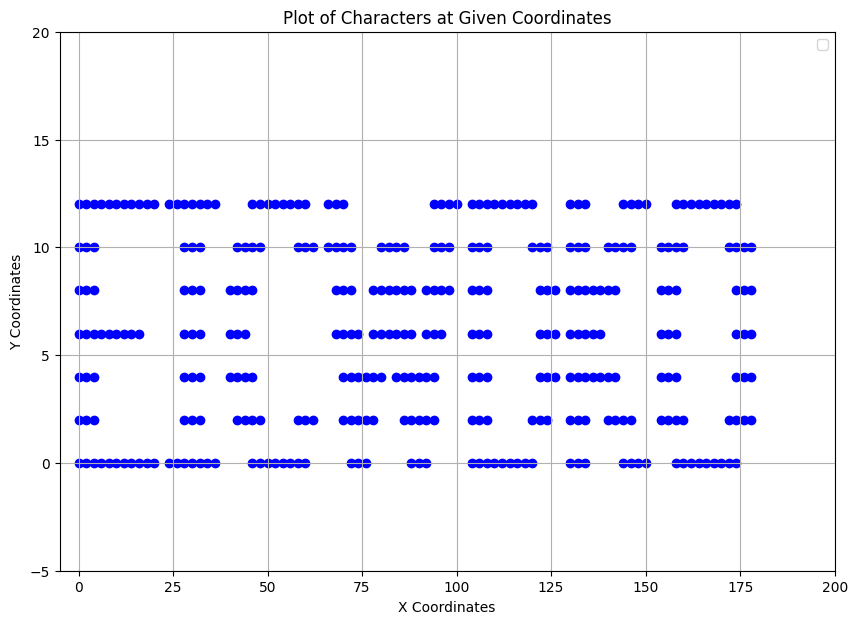

In [5]:
import matplotlib.pyplot as plt

# Sample data from the table
x_coordinates = [
    87, 23, 61, 2, 65, 31, 30, 20, 35, 2, 52, 12, 66, 69, 85, 55, 77, 9, 53, 5,
    44, 40, 14, 0, 60, 14, 22, 26, 66, 29, 8, 80, 34, 8, 87, 47, 6, 45, 45, 29,
    65, 52, 6, 2, 58, 66, 16, 54, 24, 67, 9, 62, 44, 21, 62, 15, 0, 4, 70, 63,
    78, 81, 87, 2, 16, 36, 43, 68, 18, 4, 62, 30, 79, 75, 53, 24, 54, 22, 79, 67,
    25, 56, 87, 2, 1, 55, 72, 79, 42, 37, 79, 22, 88, 1, 46, 66, 30, 14, 39, 67,
    1, 89, 46, 70, 35, 73, 7, 52, 81, 47, 38, 78, 54, 53, 38, 15, 66, 31, 33, 43,
    34, 80, 82, 65, 67, 25, 44, 36, 21, 75, 86, 18, 46, 73, 7, 72, 53, 17, 34, 54,
    41, 0, 23, 60, 15, 83, 73, 62, 89, 86, 49, 86, 63, 73, 2, 16, 67, 30, 10, 15,
    7, 61, 61, 83, 36, 39, 50, 47, 71, 56, 14, 78, 21, 8, 66, 52, 22, 42, 13, 6,
    43, 65, 44, 29, 67, 23, 24, 60, 66, 44, 39, 88, 4, 52, 48, 45, 5, 79, 35, 27,
    57, 84, 22, 0, 33, 74, 58, 39, 87, 24, 1, 46, 89, 3, 5, 43, 42, 41, 28, 61,
    38, 87, 68, 10, 16, 14, 0, 37, 89, 48, 17, 36, 48, 46, 59, 52, 77, 35, 74,
    35, 15, 72, 23, 79, 49, 23, 82, 21, 20, 59, 54, 36, 12, 89, 86, 57, 14, 65,
    78, 42, 29, 16, 1, 80, 65, 37, 54, 70, 84, 40, 88, 47, 23, 28, 15, 77, 53,
    35, 1, 87, 88, 34, 47, 54, 78, 0, 61, 20, 69, 62, 63, 67, 72, 36, 0, 41, 49,
    14, 15, 47, 2, 88, 43, 26, 71, 71, 53, 16, 40, 77, 3, 37, 53, 65, 77, 70, 79,
    68, 3, 60, 52, 80, 13, 16, 48, 85, 40, 21, 71, 69, 1, 27
]

y_coordinates = [
    3, 2, 4, 1, 4, 5, 6, 4, 1, 6, 1, 0, 6, 4, 0, 6, 3, 0, 6, 3,
    3, 3, 0, 5, 0, 3, 1, 6, 2, 5, 0, 5, 5, 3, 1, 6, 0, 1, 2, 1,
    6, 2, 3, 4, 0, 1, 0, 3, 6, 1, 6, 2, 0, 4, 5, 6, 0, 0, 2, 4,
    1, 0, 0, 2, 4, 4, 3, 2, 6, 3, 3, 0, 1, 6, 4, 0, 2, 3, 5, 6,
    0, 0, 4, 3, 0, 0, 1, 4, 3, 2, 2, 4, 4, 1, 4, 3, 5, 1, 3, 2,
    5, 1, 0, 1, 3, 5, 3, 0, 6, 1, 0, 4, 4, 5, 1, 5, 4, 1, 6, 4,
    3, 6, 6, 5, 0, 6, 2, 2, 2, 0, 0, 0, 3, 0, 0, 5, 1, 0, 6, 6,
    4, 4, 5, 1, 2, 6, 6, 4, 3, 6, 4, 5, 3, 1, 5, 5, 4, 1, 0, 1,
    6, 5, 1, 0, 0, 1, 6, 4, 5, 6, 4, 3, 5, 6, 5, 3, 5, 4, 0, 6,
    2, 2, 1, 0, 5, 4, 1, 5, 0, 4, 2, 2, 6, 6, 6, 0, 0, 6, 5, 6,
    6, 0, 2, 3, 5, 6, 6, 4, 6, 5, 3, 2, 5, 3, 6, 5, 2, 5, 6, 2,
    2, 5, 4, 6, 6, 5, 6, 3, 2, 3, 6, 3, 4, 1, 6, 5, 1, 6, 0, 2,
    3, 0, 0, 3, 5, 1, 0, 3, 3, 0, 1, 5, 6, 4, 1, 0, 2, 0, 2, 5,
    6, 3, 6, 0, 3, 1, 5, 4, 6, 2, 3, 3, 6, 0, 0, 4, 2, 4, 4, 2,
    1, 4, 2, 0, 5, 1, 3, 2, 3, 1, 2, 3, 6, 1, 2, 3, 6, 6, 4, 5,
    0, 5, 1, 0, 4, 1, 0, 2, 5, 5, 0, 0, 3, 1, 2, 5, 0, 3, 6, 6,
    4, 1, 6, 1, 5, 6, 4, 1, 2, 2, 2, 0
]


    # Continuing from the previous code, let's finish the plot

# Characters at each coordinate
characters = [
    '░', '█', '█', '█', '█', '░', '█', '█', '█', '█', '░', '█', '█', '░', '█', '░', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█',
    '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█', '█'
]

# Plot the coordinates with corresponding characters
fig, ax = plt.subplots(figsize=(10, 7))
# ax.scatter(x_coordinates, y_coordinates, marker='o', color='blue', label='Data Points')
x_coordinates = [x *2 for x in x_coordinates]
y_coordinates = [y *2 for y in y_coordinates]
# Adding characters to the points
# for x, y, char in zip(x_coordinates, y_coordinates, characters):
#     ax.text(x, y, char, fontsize=18, ha='center', va='center')
for x, y in zip(x_coordinates, y_coordinates):
    ax.scatter(x, y, marker='o', color='blue')
# Adding characters to the points



# Set axis labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_title('Plot of Characters at Given Coordinates')
ax.set_xlim(-5, 200)
ax.set_ylim(-5, 20)
ax.grid(True)
ax.legend()

# Display the plot
plt.show()
